In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [30]:
# Set up file directory
cwd = os.getcwd()
data_dir = os.path.join(cwd, 'NYSERDA_Data')
print(f'Data directory: {data_dir}')
vehicle_dis = pd.read_csv(os.path.join(data_dir,'Vehicle Description.csv'))
NYzipcode_df = pd.read_csv(os.path.join(data_dir, 'nys_zipcode.csv'))
NYzipcode_df = NYzipcode_df[['ZIP Code','County']]

Data directory: c:\Cornell\Research\EVI-Pro-Lite\NYSERDA_Data


c:\Users\jhesh\anaconda3\envs\ev\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (0,28,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
print(vehicle_dis.columns)
# GVWR is the Gross vehicle weight rating, 

Index(['Year', 'GVWR', 'NHTSA_Make_Name', 'NHTSA_Model_Name',
       'Drivetrain_Type', 'Vehicle_Class', 'Average_MSRP', 'Min_MSRP',
       'Max_MSRP', 'Average_Electric_Range', 'Min_Electric_Range',
       'Max_Electric_Range', 'Average_City_MPG', 'Max_City_MPG',
       'Min_City_MPG', 'Average_Highway_MPG', 'Min_Highway_MPG',
       'Max_Highway_MPG', 'Average_Highway_MPGe', 'Average_City_MPGe',
       'Min_City_MPGe', 'Max_City_MPGe', 'Min_Highway_MPGe',
       'Max_Highway_MPGe', 'Average_Level_2_Charge_Time_Hours',
       'Min_Level_2_Charge_Time_Hours', 'Max_Level_2_Charge_Time_Hours',
       'Vehicle_Index', 'EV_Atlas_Vehicle_Name', 'Vehicle_GVWR_Class',
       'Vehicle_Category', 'VIN_Key'],
      dtype='object')


In [5]:
vehicle_class = vehicle_dis['Vehicle_Class'].unique()
print(vehicle_class)

['Unknown' 'Trailer' 'Midsize Cars' 'Fire Apparatus' 'Compact Cars'
 'Truck - General' 'Incomplete Vehicle' 'Midsize Station Wagons'
 'Standard Pickup Trucks' 'Tractor Truck' 'Off Road Vehicle' 'Bus' 'Van'
 'Minivan' 'Step-Van' 'Motor Home' 'School & Shuttle Bus'
 'Vans, Cargo Type' 'Small Sport Utility Vehicle' 'Motorcycle' 'Motorhome'
 'Transit Bus' 'Standard Sport Utility Vehicle' 'Streetcar' 'PnD Class 4'
 'Subcompact Cars' 'Small Station Wagons' 'Large Cars' 'Two Seaters'
 'Vans, Passenger Type' 'Minicompact Cars' 'Small Pickup Trucks'
 'Tractor Class 8' 'Vocational Class 8' 'PnD Class 6']


In [6]:
Drivetrain_Type = vehicle_dis['Drivetrain_Type'].unique()
print(Drivetrain_Type)

['ICE' 'BEV' 'PHEV' 'UNKNOWN' 'FCV']


In [7]:
# Not sure if the data set gives vehicle of the entire USA or just in NY, needs filter
# The only similar column is vehicle index, merge two data sets
current_registrations = pd.read_csv(os.path.join(data_dir, 'Current Registrations.csv'))
merged_vehicle = pd.merge(vehicle_dis, current_registrations, on='Vehicle_Index')
print(merged_vehicle.columns)
#print(current_registrations.columns)
merged_vehicle.head()

Index(['Year', 'GVWR', 'NHTSA_Make_Name', 'NHTSA_Model_Name',
       'Drivetrain_Type', 'Vehicle_Class', 'Average_MSRP', 'Min_MSRP',
       'Max_MSRP', 'Average_Electric_Range', 'Min_Electric_Range',
       'Max_Electric_Range', 'Average_City_MPG', 'Max_City_MPG',
       'Min_City_MPG', 'Average_Highway_MPG', 'Min_Highway_MPG',
       'Max_Highway_MPG', 'Average_Highway_MPGe', 'Average_City_MPGe',
       'Min_City_MPGe', 'Max_City_MPGe', 'Min_Highway_MPGe',
       'Max_Highway_MPGe', 'Average_Level_2_Charge_Time_Hours',
       'Min_Level_2_Charge_Time_Hours', 'Max_Level_2_Charge_Time_Hours',
       'Vehicle_Index', 'EV_Atlas_Vehicle_Name', 'Vehicle_GVWR_Class',
       'Vehicle_Category', 'VIN_Key', 'Vehicle Count', 'ZIP Code',
       'RegistrationMonth', 'DMV_ID', 'Registration_Valid_Date',
       'County_GEOID'],
      dtype='object')


,Year,GVWR,NHTSA_Make_Name,NHTSA_Model_Name,Drivetrain_Type,Vehicle_Class,Average_MSRP,Min_MSRP,Max_MSRP,Average_Electric_Range,...,EV_Atlas_Vehicle_Name,Vehicle_GVWR_Class,Vehicle_Category,VIN_Key,Vehicle Count,ZIP Code,RegistrationMonth,DMV_ID,Registration_Valid_Date,County_GEOID
0,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,ICE,Unknown,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1CMTS412C,1,10465,3/1/2021,73,00:00.0,NaN
1,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,ICE,Unknown,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,124378N43,1,11777,6/1/2022,73,00:00.0,NaN
2,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,ICE,Unknown,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,124378N43,1,14612,5/1/2022,73,00:00.0,NaN
3,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,ICE,Unknown,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,124378N43,1,11763,5/1/2022,73,00:00.0,NaN
4,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,ICE,Unknown,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4PL500E1X,1,13815,10/1/2014,73,00:00.0,NaN


In [31]:
# Filter out error in zipcode
merged_vehicle = merged_vehicle[merged_vehicle['ZIP Code'] != 'Error']

# Filter for NYS Zip codes
merged_vehicle['ZIP Code'] = merged_vehicle['ZIP Code'].astype(int)  # Changing object or strings into interger
merged_vehicle = merged_vehicle[merged_vehicle['ZIP Code'].isin(NYzipcode_df['ZIP Code'])]
merged_vehicle = merged_vehicle[merged_vehicle['Vehicle_Class'] != 'Unknown']
merged_vehicle.head()

,Year,GVWR,NHTSA_Make_Name,NHTSA_Model_Name,Drivetrain_Type,Vehicle_Class,Average_MSRP,Min_MSRP,Max_MSRP,Average_Electric_Range,...,EV_Atlas_Vehicle_Name,Vehicle_GVWR_Class,Vehicle_Category,VIN_Key,Vehicle Count,ZIP Code,RegistrationMonth,DMV_ID,Registration_Valid_Date,County_GEOID
1650,2012,UNKNOWN,UNKNOWN,UNKNOWN,ICE,Trailer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5JWTD142C,1,12901,9/1/2022,73,00:00.0,NaN
1651,2012,UNKNOWN,UNKNOWN,UNKNOWN,ICE,Trailer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5JWTU081C,1,14120,5/1/2019,73,00:00.0,NaN
1652,2012,UNKNOWN,UNKNOWN,UNKNOWN,ICE,Trailer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5JWTD122C,1,12010,11/1/2022,73,00:00.0,NaN
1653,2012,UNKNOWN,UNKNOWN,UNKNOWN,ICE,Trailer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5JWTC182C,2,13403,8/1/2014,73,00:00.0,NaN
1654,2013,UNKNOWN,UNKNOWN,UNKNOWN,ICE,Trailer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1ZE1SLT1D,1,12233,6/1/2014,73,00:00.0,NaN


In [22]:
# merged_vehicle.head()
# From above vehicle type reading, for residental use, assume the following classes:
# Midsize Cars, Compact Cars, Midsize Station Wagons, Standard Pickup Trucks, Van, Minivan, Small Sport Utility Vehicle
# Standard Sport Utility Vehicle, Subcompact Cars, Small Station Wagons, Large Cars, Two Seaters, Minicompact Cars
# Small Pickup Trucks
# All types above are residental vehicles. 
residental_vehicle = ['Midsize Cars', 'Compact Cars', 'Midsize Station Wagons', 'Standard Pickup Trucks', 'Van', 'Minivan', 'Small Sport Utility Vehicle', 'Standard Sport Utility Vehicle', 'Subcompact Cars', 'Small Station Wagons', 'Large Cars', 'Two Seaters', 'Minicompact Cars', 'Small Pickup Trucks']
home_use_all = merged_vehicle[(merged_vehicle['Vehicle_Class'].isin(residental_vehicle))]
selected_columns = ['Year','Drivetrain_Type','Vehicle_Class','VIN_Key','ZIP Code','RegistrationMonth','DMV_ID','Vehicle Count']
home_use_selected = home_use_all[selected_columns]
home_use_selected.head()

,Year,Drivetrain_Type,Vehicle_Class,VIN_Key,ZIP Code,RegistrationMonth,DMV_ID,Vehicle Count
1781,2021,ICE,Compact Cars,SBM14RCAM,10504,2/1/2023,73,1
1782,1995,ICE,Compact Cars,WP0AA296S,12061,4/1/2022,73,1
1783,1995,ICE,Compact Cars,WP0AA296S,10024,10/1/2021,73,1
1784,2015,ICE,Compact Cars,WAULGBFRF,14227,7/1/2022,73,1
1785,1989,ICE,Compact Cars,ZA9CA05AK,12188,4/1/2022,73,1


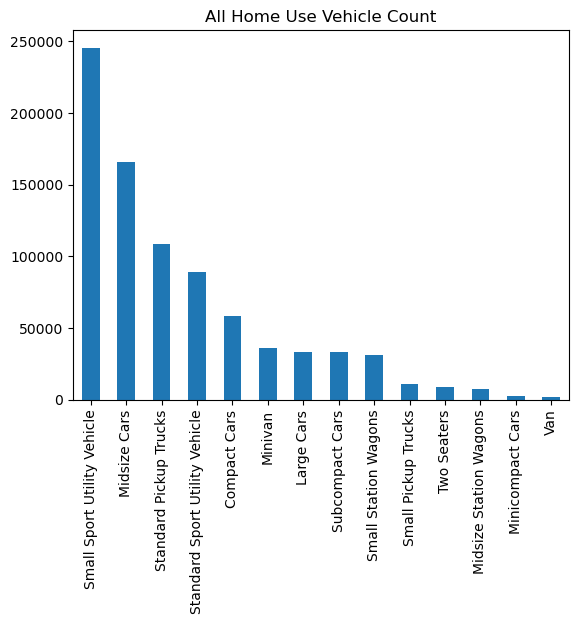

Small Sport Utility Vehicle       245433
Midsize Cars                      165541
Standard Pickup Trucks            108803
Standard Sport Utility Vehicle     89012
Compact Cars                       58672
Minivan                            35680
Large Cars                         33316
Subcompact Cars                    33298
Small Station Wagons               30955
Small Pickup Trucks                10684
Two Seaters                         8856
Midsize Station Wagons              7420
Minicompact Cars                    2385
Van                                 1947
Name: Vehicle_Class, dtype: int64


In [41]:
vehicle_counts = home_use_selected['Vehicle_Class'].value_counts()
vehicle_counts.plot(kind = 'bar')
plt.title('All Home Use Vehicle Count')
plt.show()
print(vehicle_counts)

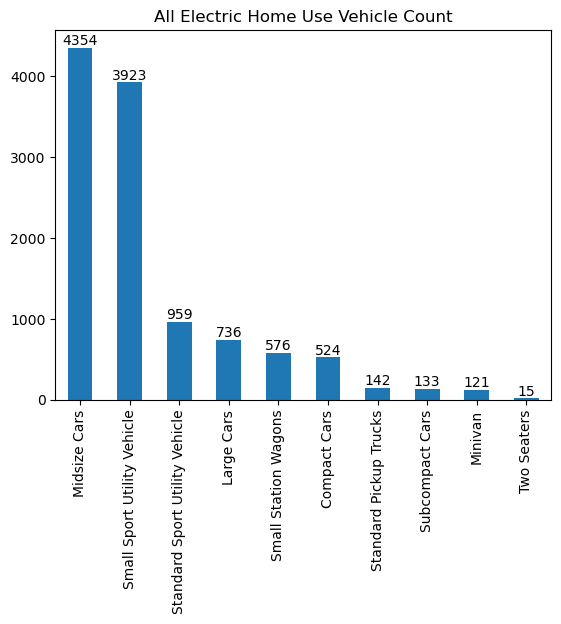

In [42]:
electric_vehicle = ['BEV','PHEV']
home_electric = home_use_selected[(home_use_selected['Drivetrain_Type'].isin(electric_vehicle))]
home_electric_counts = home_electric['Vehicle_Class'].value_counts()
home_electric_counts.plot(kind = 'bar')
for i, v in enumerate(home_electric_counts):
    plt.text(i,v, str(v), ha = 'center', va = 'bottom')
plt.title('All Electric Home Use Vehicle Count')
plt.show()

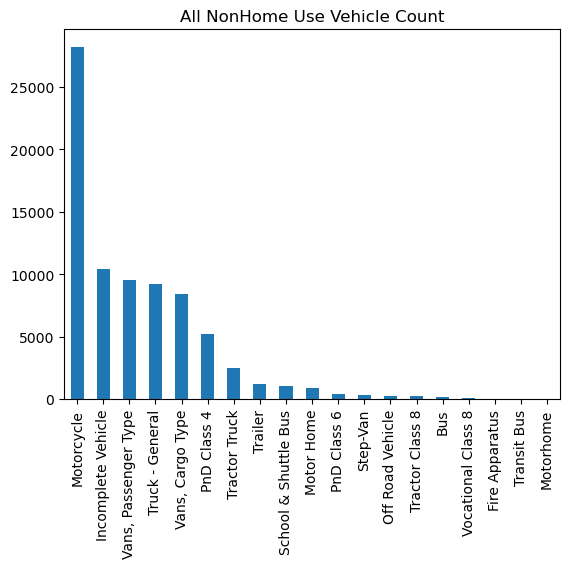

Motorcycle              28186
Incomplete Vehicle      10426
Vans, Passenger Type     9496
Truck - General          9192
Vans, Cargo Type         8387
PnD Class 4              5198
Tractor Truck            2480
Trailer                  1171
School & Shuttle Bus     1058
Motor Home                896
PnD Class 6               421
Step-Van                  286
Off Road Vehicle          258
Tractor Class 8           203
Bus                       201
Vocational Class 8         93
Fire Apparatus             41
Transit Bus                12
Motorhome                  11
Name: Vehicle_Class, dtype: int64


In [58]:
# Filter the rest of the vehicles that is unlikely to be used by homes
nonhome_use_all = merged_vehicle[~merged_vehicle['Vehicle_Class'].isin(residental_vehicle)]
selected_columns = ['Year','Drivetrain_Type','Vehicle_Class','VIN_Key','ZIP Code','RegistrationMonth','DMV_ID','Vehicle Count']
nonhome_use_selected = nonhome_use_all[selected_columns]
nonhome_vehicle_counts = nonhome_use_selected['Vehicle_Class'].value_counts()
nonhome_vehicle_counts.plot(kind = 'bar')
plt.title('All NonHome Use Vehicle Count')
plt.show()
print(nonhome_vehicle_counts)

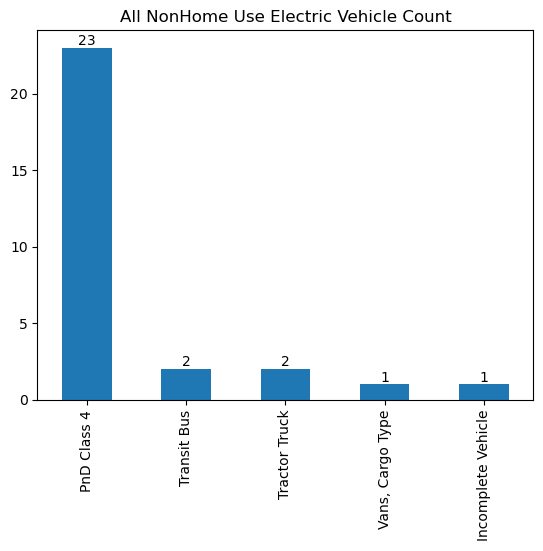

In [59]:
electric_vehicle = ['BEV','PHEV']
nonhome_electric = nonhome_use_selected[(nonhome_use_selected['Drivetrain_Type'].isin(electric_vehicle))]
nonhome_electric_counts = nonhome_electric['Vehicle_Class'].value_counts()
nonhome_electric_counts.plot(kind = 'bar')
for i, v in enumerate(nonhome_electric_counts):
    plt.text(i,v, str(v), ha = 'center', va = 'bottom')
plt.title('All NonHome Use Electric Vehicle Count')
plt.show()

#### Create a table for home use vehicle by NY county

In [73]:
# home_use_selected gives all vehicles that is home use
home_use_selected_by_county = home_use_selected.merge(NYzipcode_df, on='ZIP Code',how = 'left')
home_vehicle_type_by_county = home_use_selected_by_county.groupby(['County', 'Vehicle_Class','Drivetrain_Type'])['Vehicle Count'].sum().reset_index()
home_vehicle_type_by_county

,County,Vehicle_Class,Drivetrain_Type,Vehicle Count
0,Albany County,Compact Cars,BEV,2
1,Albany County,Compact Cars,ICE,1228
2,Albany County,Compact Cars,PHEV,12
3,Albany County,Large Cars,BEV,8
4,Albany County,Large Cars,ICE,713
...,...,...,...,...
1492,Yates County,Standard Pickup Trucks,ICE,469
1493,Yates County,Standard Sport Utility Vehicle,ICE,95
1494,Yates County,Subcompact Cars,ICE,46
1495,Yates County,Two Seaters,ICE,17


In [74]:
# rearrange the data set, we have:
home_use_county_table = pd.pivot_table(home_vehicle_type_by_county,index = 'County',columns = ['Vehicle_Class','Drivetrain_Type'], values = 'Vehicle Count')
new_column_names = {'Midsize Cars':'Midsize Cars', 'Compact Cars':'Compact Cars', 'Midsize Station Wagons':'Midsize Station Wagons', 
     'Standard Pickup Trucks':'Standard Pickup Trucks', 'Van':'Van', 'Minivan':'Minivan', 
     'Small Sport Utility Vehicle':'Small Sport Utility Vehicle', 'Standard Sport Utility Vehicle':'Standard Sport Utility Vehicle', 
     'Subcompact Cars':'Subcompact Cars', 'Small Station Wagons':'Small Station Wagons', 'Large Cars':'Large Cars', 
     'Two Seaters':'Two Seaters', 'Minicompact Cars':'Minicompact Cars', 'Small Pickup Trucks':'Small Pickup Trucks'}
home_use_county_table = home_use_county_table.rename(columns=new_column_names)
home_use_county_table = home_use_county_table.fillna(0)
home_use_county_table

Vehicle_Class      Compact Cars               Large Cars               \
Drivetrain_Type             BEV     ICE  PHEV        BEV     ICE PHEV   
County                                                                  
Albany County               2.0  1228.0  12.0        8.0   713.0  1.0   
Allegany County             0.0   120.0   1.0        0.0    92.0  0.0   
Bronx County                0.0  1756.0   4.0        4.0   955.0  1.0   
Broome County               1.0   817.0   4.0        5.0   467.0  0.0   
Cattaraugus County          1.0   160.0   3.0        0.0   134.0  0.0   
...                         ...     ...   ...        ...     ...  ...   
Washington County           0.0   206.0   3.0        0.0   118.0  0.0   
Wayne County                0.0   328.0   4.0        0.0   251.0  0.0   
Westchester County          7.0  4463.0  31.0      124.0  1947.0  5.0   
Wyoming County              0.0   104.0   1.0        2.0    73.0  0.0   
Yates County                0.0    69.0   1.0        0.0    47.0  0.0   

Vehicle_Class      Midsize Cars                Midsize Station Wagons  ...  \
Drivetrain_Type             BEV     ICE   PHEV                    ICE  ...   
County                                                                 ...   
Albany County              31.0  3559.0   82.0                  160.0  ...   
Allegany County             0.0   320.0    3.0                   16.0  ...   
Bronx County               32.0  5508.0   18.0                  221.0  ...   
Broome County               4.0  2330.0   40.0                  102.0  ...   
Cattaraugus County          0.0   519.0    1.0                   28.0  ...   
...                         ...     ...    ...                    ...  ...   
Washington County           3.0   595.0    7.0                   32.0  ...   
Wayne County                2.0   988.0   12.0                   46.0  ...   
Westchester County        343.0  9976.0  125.0                  492.0  ...   
Wyoming County              0.0   279.0    3.0                   19.0  ...   
Yates County                0.0   172.0    4.0                   12.0  ...   

Vehicle_Class      Standard Sport Utility Vehicle                \
Drivetrain_Type                               BEV     ICE  PHEV   
County                                                            
Albany County                                 3.0  1347.0   9.0   
Allegany County                               0.0   163.0   0.0   
Bronx County                                  7.0  2799.0   6.0   
Broome County                                 5.0   798.0   2.0   
Cattaraugus County                            0.0   368.0   0.0   
...                                           ...     ...   ...   
Washington County                             0.0   247.0   0.0   
Wayne County                                  1.0   482.0   0.0   
Westchester County                           78.0  6703.0  55.0   
Wyoming County                                0.0   206.0   0.0   
Yates County                                  0.0    95.0   0.0   

Vehicle_Class      Subcompact Cars              Two Seaters                Van  
Drivetrain_Type                BEV     ICE PHEV         BEV    ICE PHEV    ICE  
County                                                                          
Albany County                  2.0   597.0  2.0         0.0  168.0  0.0  123.0  
Allegany County                0.0    72.0  0.0         0.0   20.0  0.0    6.0  
Bronx County                   1.0   811.0  1.0         0.0  103.0  1.0   75.0  
Broome County                  0.0   391.0  0.0         0.0  121.0  0.0   24.0  
Cattaraugus County             0.0   125.0  0.0         0.0   24.0  0.0    6.0  
...                            ...     ...  ...         ...    ...  ...    ...  
Washington County              0.0   129.0  0.0         0.0   30.0  0.0   10.0  
Wayne County                   0.0   206.0  0.0         0.0   70.0  0.0   21.0  
Westchester County            13.0  2494.0  3.0       

In [51]:
home_use_county_table.to_csv('C:\Cornell\Research\EVI-Pro-Lite\Generated Data\All_home_use_vehicle_by_NYcounty.csv',index = True)

#### Create a table for Nonhome use vehicle by county

In [67]:
nonhome_use_selected_by_county = nonhome_use_selected.merge(NYzipcode_df, on='ZIP Code',how = 'left')
nonhome_vehicle_type_by_county = nonhome_use_selected_by_county.groupby(['County', 'Vehicle_Class','Drivetrain_Type'])['Vehicle Count'].sum().reset_index()
nonhome_vehicle_types = nonhome_vehicle_type_by_county['Vehicle_Class'].unique()
nonhome_vehicle_types

array(['Bus', 'Fire Apparatus', 'Incomplete Vehicle', 'Motor Home',
       'Motorcycle', 'Off Road Vehicle', 'PnD Class 4', 'PnD Class 6',
       'School & Shuttle Bus', 'Step-Van', 'Tractor Class 8',
       'Tractor Truck', 'Trailer', 'Transit Bus', 'Truck - General',
       'Vans, Cargo Type', 'Vans, Passenger Type', 'Vocational Class 8',
       'Motorhome'], dtype=object)

In [68]:
nonhome_vehicle_type_by_county

,County,Vehicle_Class,Drivetrain_Type,Vehicle Count
0,Albany County,Bus,ICE,38
1,Albany County,Fire Apparatus,ICE,1
2,Albany County,Incomplete Vehicle,ICE,332
3,Albany County,Motor Home,ICE,16
4,Albany County,Motorcycle,ICE,505
...,...,...,...,...
920,Yates County,Trailer,ICE,7
921,Yates County,Truck - General,ICE,40
922,Yates County,"Vans, Cargo Type",ICE,8
923,Yates County,"Vans, Passenger Type",ICE,6


In [76]:
# Rearrange Data Set, we have:
nonhome_use_county_table = pd.pivot_table(nonhome_vehicle_type_by_county,index = 'County',columns = ['Vehicle_Class','Drivetrain_Type'], values = 'Vehicle Count')
new_column_names = {'Bus':'Bus', 'Fire Apparatus':'Fire Apparatus', 'Incomplete Vehicle':'Incomplete Vehicle', 'Motor Home':'Motor Home',
       'Motorcycle':'Motorcycle', 'Off Road Vehicle':'Off Road Vehicle', 'PnD Class 4':'PnD Class 4', 'PnD Class 6':'PnD Class 6',
       'School & Shuttle Bus':'School & Shuttle Bus', 'Step-Van':'Step-Van', 'Tractor Class 8':'Tractor Class 8',
       'Tractor Truck':'Tractor Truck', 'Trailer':'Trailer', 'Transit Bus':'Transit Bus', 'Truck - General':'Truck - General',
       'Vans, Cargo Type':'Vans, Cargo Type', 'Vans, Passenger Type':'Vans, Passenger Type', 'Vocational Class 8':'Vocational Class 8',
       'Motorhome':'Motorhome'}
nonhome_use_county_table = nonhome_use_county_table.rename(columns=new_column_names)
nonhome_use_county_table = nonhome_use_county_table.fillna(0)
nonhome_use_county_table

Vehicle_Class         Bus Fire Apparatus Incomplete Vehicle        Motor Home  \
Drivetrain_Type       ICE            ICE                BEV    ICE        ICE   
County                                                                          
Albany County        38.0            1.0                0.0  332.0       16.0   
Allegany County       0.0            1.0                0.0   63.0        7.0   
Bronx County        431.0            0.0                0.0  263.0        2.0   
Broome County         4.0            0.0                0.0  144.0       12.0   
Cattaraugus County    1.0            0.0                0.0   78.0       13.0   
...                   ...            ...                ...    ...        ...   
Washington County     0.0            0.0                0.0   87.0        9.0   
Wayne County          0.0            0.0                0.0  100.0       21.0   
Westchester County   19.0            1.0                0.0  743.0       10.0   
Wyoming County        2.0            0.0                0.0   49.0        5.0   
Yates County          0.0            0.0                0.0   23.0        3.0   

Vehicle_Class      Motorcycle Motorhome Off Road Vehicle PnD Class 4         \
Drivetrain_Type           ICE       ICE              ICE         BEV    ICE   
County                                                                        
Albany County           505.0       0.0              7.0         0.0  222.0   
Allegany County         130.0       0.0              1.0         0.0   26.0   
Bronx County            514.0       0.0              3.0         1.0   54.0   
Broome County           444.0       0.0              1.0         0.0   58.0   
Cattaraugus County      277.0       0.0              8.0         0.0   46.0   
...                       ...       ...              ...         ...    ...   
Washington County       285.0       0.0              2.0         0.0   46.0   
Wayne County            406.0       0.0              4.0         0.0   57.0   
Westchester County     1105.0       0.0              5.0         3.0  212.0   
Wyoming County          156.0       0.0              0.0         0.0   36.0   
Yates County            100.0       1.0              1.0         0.0   22.0   

Vehicle_Class       ... Tractor Truck        Trailer Transit Bus        \
Drivetrain_Type     ...           BEV    ICE     ICE         BEV   ICE   
County              ...                                                  
Albany County       ...           0.0  104.0   236.0         0.0   2.0   
Allegany County     ...           0.0   21.0     8.0         0.0   0.0   
Bronx County        ...           1.0   40.0     1.0         0.0  55.0   
Broome County       ...           0.0   57.0    11.0         0.0   0.0   
Cattaraugus County  ...           0.0   29.0    12.0         0.0   0.0   
...                 ...           ...    ...     ...         ...   ...   
Washington County   ...           0.0   21.0    10.0         0.0   0.0   
Wayne County        ...           0.0   43.0    17.0         0.0   0.0   
Westchester County  ...           0.0   60.0    47.0         0.0   0.0   
Wyoming County      ...           0.0   42.0     3.0         0.0   0.0   
Yates County        ...           0.0    4.0     7.0         0.0   0.0   

Vehicle_Class      Truck - General Vans, Cargo Type         \
Drivetrain_Type                ICE              BEV    ICE   
County                                                       
Albany County                555.0              0.0  140.0   
Allegany County               61.0              0.0    7.0   
Bronx County                 132.0              0.0  305.0   
Broome County                139.0              0.0   79.0   
Cattaraugus County            76.0              0.0   23.0   
...                            ...              ...    ...   
Washington County             68.0              0.0   16.0   
Wayne County                 109.0              0.0   36.0   
Westchester County           534.0     

In [77]:
nonhome_use_county_table.to_csv('C:\Cornell\Research\EVI-Pro-Lite\Generated Data\All_nonhome_use_vehicle_by_NYcounty.csv',index = True)